Gender-Neutral Clustering with K-Means and GMM

#Project Goal
This project applies unsupervised learning techniques to cluster individuals based on key features. Two algorithms are compared: K-Means and Gaussian Mixture Model (GMM). The goal is to find natural groupings in the data and analyze whether the clusters align with the M/F gender labels.



**-Que:** Can we identify meaningful groups in a population based on features like salary, housework time, height, and weight—without knowing their gender?




### Exercise: Clustering

File clustering.csv contains synthetic data about salary, housecare time, height and weight of some individuals. It also contains an indicator variable M/F to indicate whether the individual in question is female/male.

**in this part we have 2 step:**

**1.Clustering the Data:**
*  Perform clustering using K-Means and Gaussian Mixture Model (GMM) algorithms
*   Use the features Salary, Housecare time, Height, and Weight for clustering. (The M/F variable will not be used at this stage).


**2.Cluster Analysis:**

*   Compare the statistical properties of the clusters with the original data.
*   In this step, you can use the M/F variable to evaluate and interpret the clustering results.




In [ ]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from scipy.stats import norm
import math
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Step 1: Read input (1p)

 Check genfromtxt() documentation and choose right delimiter and skip_header parameter values.

In [ ]:
data = genfromtxt('/content/clustering.csv', delimiter=',', skip_header=1)
print(data.shape)

(51, 5)


In [ ]:
assert(data.shape[1] == 5)

#### Step 2: Scale (1p)

**Split the data into x and y:**

*  x should include all columns except for the last one.
*  y should include the last column (which contains the M/F information).

**Scale the x data:**
*   We use StandardScaler to scale the data, which standardizes it by making each feature have a mean of 0 and a standard deviation of 1



In [ ]:
# assign to x the data excluding class info (last column) that gets assigned to y
# scale x data (assign scaler object to variable scaler) and assign to scaled_x

# x = ...
x = data[:, :-1]  # All columns except the last one
# y = ...
y = data[:, -1]   # Only the last column (M/F)

# scaler = ...
# scaled_x = ...
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [ ]:
# if this cell passes silently, data shapes are ok
# Check that the data shapes are correct
assert(x.shape[1] == 4)
assert(y.shape[0] == 51)

#### Step 3: KMeans clustering (2p)

Cluster the data with KMeans. Assign the fitted KMeans object to variable kmeans. Compute per cluster means and compare with from sample data.

**Cluster the data using KMeans:**

*   We'll use the KMeans algorithm to cluster the data into groups.
*   The KMeans model will be trained on the scaled data (scaled_x).

**Compute per-cluster means:**

*   After clustering, we'll compute the mean for each feature within each cluster.
*   Since the data was scaled, we'll need to inverse transform the scaled data to compare the cluster means with the original data.




In [ ]:
# kmeans = ...
# Apply KMeans clustering with 2 clusters (since we're expecting two groups)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_x)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# print out feature means for the clusters
print("Cluster 0 means", np.mean(scaler.inverse_transform(scaled_x[kmeans.labels_ == 0]),axis=0))
print("Cluster 1 means", np.mean(scaler.inverse_transform(scaled_x[kmeans.labels_ == 1]),axis=0))

Cluster 0 means [3129.21428571  153.57142857  174.85714286   79.21428571]
Cluster 1 means [2660.39130435  244.95652174  159.34782609   69.2173913 ]


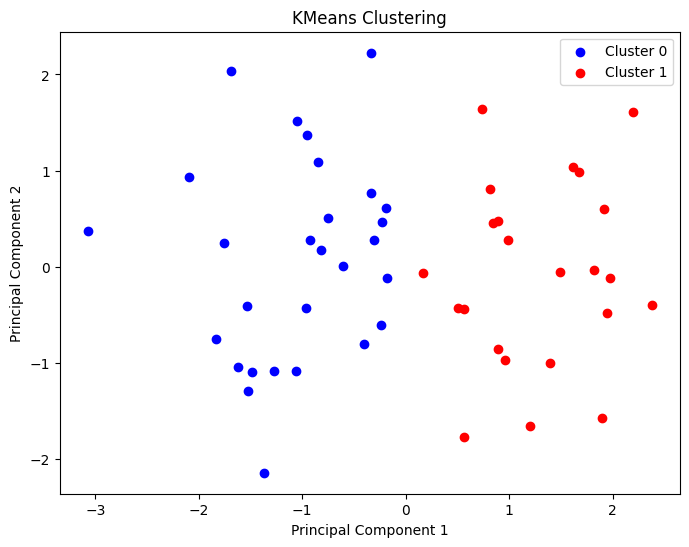

In [ ]:
#show the diagram

# Apply PCA to reduce the dimensions to 2 for plotting
pca = PCA(n_components=2)
reduced_x = pca.fit_transform(scaled_x)

# Fit KMeans and predict labels
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled_x)
labels = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_x[labels == 0, 0], reduced_x[labels == 0, 1], c='blue', label='Cluster 0')
plt.scatter(reduced_x[labels == 1, 0], reduced_x[labels == 1, 1], c='red', label='Cluster 1')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### Step 4: GMM (2p)

Perform soft (Gaussian) clustering of the data. Compare the per class cluster means with means from sample data.

In [ ]:
# gmm = ...
# print("Cluster means", ...)

# Apply Gaussian Mixture Model clustering with 2 components (since we're expecting two groups)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(scaled_x)

# Print out feature means for the clusters
print("Cluster means", gmm.means_)

# If you want to compare the means with the sample data, you can inverse transform the scaled data and calculate the means
print("Cluster 0 means", np.mean(scaler.inverse_transform(scaled_x[gmm.predict(scaled_x) == 0]), axis=0))
print("Cluster 1 means", np.mean(scaler.inverse_transform(scaled_x[gmm.predict(scaled_x) == 1]), axis=0))

Cluster means [[ 0.30252334 -0.56081336  0.62137303  0.18924439]
 [-0.46236019  0.85711657 -0.94967268 -0.28923081]]
Cluster 0 means [3110.53333333  158.23333333  174.7          77.86666667]
Cluster 1 means [2642.42857143  247.          158.0952381    70.19047619]


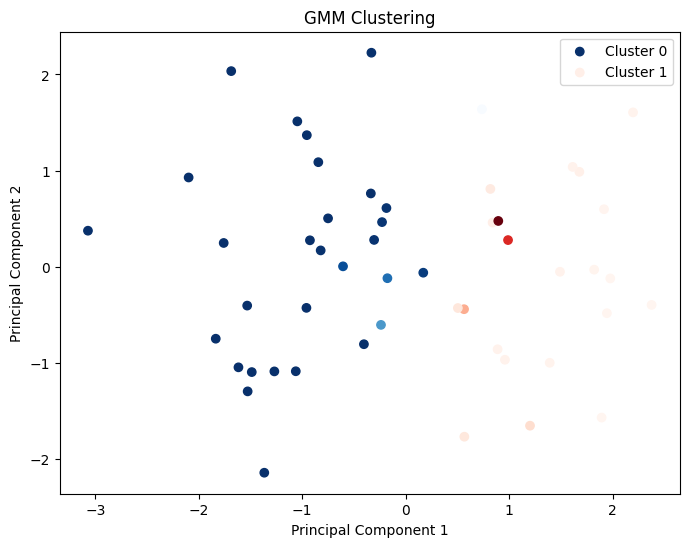

In [ ]:
#show the diagram

# Fit GMM and predict labels
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(scaled_x)
gmm_labels = gmm.predict(scaled_x)

# Plot the clusters (soft assignment with probabilities)
probs = gmm.predict_proba(scaled_x)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_x[gmm_labels == 0, 0], reduced_x[gmm_labels == 0, 1], c=probs[gmm_labels == 0, 0], cmap='Blues', label='Cluster 0')
plt.scatter(reduced_x[gmm_labels == 1, 0], reduced_x[gmm_labels == 1, 1], c=probs[gmm_labels == 1, 0], cmap='Reds', label='Cluster 1')
plt.title('GMM Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### Step 5: Looking at the results (3p)

Please answer in the cell below.

1. What is the purpose of scaler.inverse_transform() call? Could you avoid it?

The scaler.inverse_transform() is used to convert the scaled data back to its original units, so we can interpret the cluster means in real-world terms. Without this, the data would remain in the scaled space, making it hard to understand.

2. Which set of mean values represents cluster of females? Does it match the label (0 / 1)? Should it match? Why / why not?

Cluster 1, with higher housecare time and lower salary, is likely to represent females. However, since the algorithm clusters based on features (not gender), the clusters may not match the 0/1 labels for gender.


3. Compare the statistics (means, stds etc) from clustered data with those calculated from real sample classes. Any noticable differences?

When comparing the means and standard deviations with the original data (using the M/F column), there are slight differences because clustering focuses on the features and doesn't directly consider gender.